In [50]:

%matplotlib inline
from math import pi
import numpy as np
import matplotlib.pyplot as plt
# change some of the defaults for plots
plt.rcParams['text.usetex'] = False
#plt.rcParams['axes.grid'] = True
plt.rcParams['figure.figsize'] = [18,6]
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
from numpy.fft import fft2, ifft2, fftshift

# A function to show three images side by side for comparison before and after convolution/deconvolution
def threeImages( image1, image2, image3 ) :
    # shows three images in a row
    fig = plt.figure()
    ax1 = fig.add_subplot( 1, 3, 1 )
    ax2 = fig.add_subplot( 1, 3, 2 )
    ax3 = fig.add_subplot( 1, 3, 3 )

    ax1.imshow( image1, cmap='gray' )
    ax2.imshow( image2, cmap='gray' )
    ax3.imshow( image3, cmap='gray' )

In [51]:
# I'm going to construct a pinhole camera - a tiny aperture - which passes through light given off by an object, forming an image on the other side of the pinhole camera. 
# We'll use SciPy's available misc.face which returns a raccoon face as the object we're taking a 'picture' of via our pinhole camera
# get the object and its size
import scipy.misc
face = scipy.misc.face( gray = True ).astype( float )
Ny, Nx = face.shape
X, Y = np.meshgrid( range(Nx), range(Ny) )

# pinhole optical system
r = 20 # pinhole size, the smaller this is the sharper the image will be
lens = np.ones([Ny,Nx]) * ( (X-Nx//2)**2 + (Y-Ny//2)**2 < r**2 )  # Boolean operation


Left to right: object, pinhole Camera, resulting Image


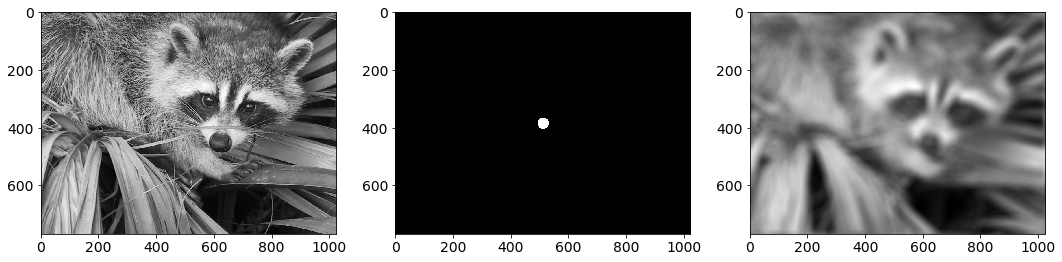

In [52]:
# Creating a convolution function to pass the image of a racoon face through a simulated pinhole camera:
# NOTE: Python FFTs give results that need to be shifted. Hence we use fftshift().
def convolve( f, h ) :
    return fftshift( ifft2( fft2( f ) * fft2( h ) ) ).real

faceImage = convolve( face, lens )
# show the results
threeImages( face, lens, faceImage )
print('Left to right: object, pinhole Camera, resulting Image')

Left to right: object, blurred image from pinhole camera, simple (fourier) deconvolution of image


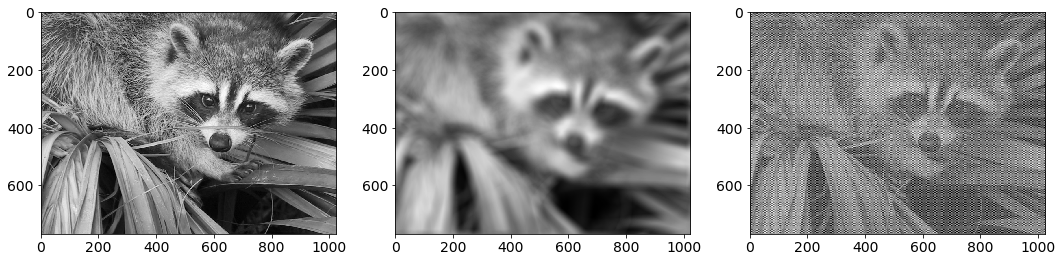

In [53]:
# deconvolution means we divide instead of multiply in reciprocal fourier (frequency domain) space
def deconvolve( g, h ) :
    return fftshift( ifft2( fft2( g ) / fft2( h ) ) ).real

betterFace = deconvolve( faceImage, lens )

# show the results
threeImages( face, faceImage, betterFace )
print('Left to right: object, blurred image from pinhole camera, simple (fourier) deconvolution of image')

Left to right: object, simple deconvolution, 100 iterations of Richardson-Lucy Deconvolution


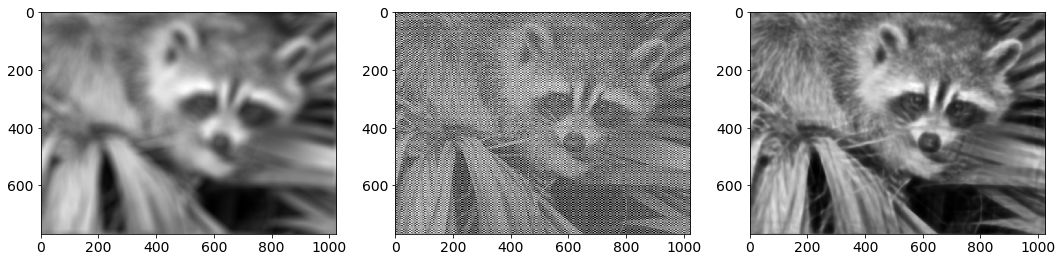

In [54]:
# Instead of simple deconvolution using fourier transform alone, we employ the Richardson-Lucy Deconvolution Algorithm:
def rld( f, g, h ) :
    return f * convolve( g / convolve( f, h ), h )

bestFace = faceImage
for i in range( 100 ) :
    bestFace = rld( bestFace, faceImage, lens )

# show the results
threeImages( faceImage, betterFace, bestFace )

print('Left to right: object, simple deconvolution, 100 iterations of Richardson-Lucy Deconvolution')